In [1]:
import requests
from xml.etree import ElementTree
from selectolax.parser import HTMLParser

response = requests.get("https://whotracks.me/trackers.html")

In [2]:
def get_text_selectolax(html):
    trackers = []
    # try:
    tree = HTMLParser(html)
    if tree.body is None:
        return trackers
    for node in tree.tags("style"):
        node.decompose()
    for node in tree.css('li'):
        a = node.css("a")
        for a_node in a:
            if "href" in a_node.attributes:
                print(a_node.attributes['href'])
get_text_selectolax(response.text)

./trackers.html
./websites.html
./blog.html
./explorer.html
/
/trackers.html
#popularity
#category
./trackers/gstatic.html
./trackers/google_tag_manager.html
./trackers/google_analytics.html
./trackers/google.html
./trackers/google_fonts.html
./trackers/doubleclick.html
./trackers/googleapis.com.html
./trackers/facebook.html
./trackers/youtube.html
./trackers/google_users.html
./trackers/amazon_cloudfront.html
./trackers/amazon_adsystem.html
./trackers/google_syndication.html
./trackers/google_photos.html
./trackers/cloudflare.html
./trackers/scorecard_research_beacon.html
./trackers/google_adservices.html
./trackers/twitter.html
./trackers/amazon_web_services.html
./trackers/jsdelivr.html
./trackers/bing_ads.html
./trackers/new_relic.html
./trackers/optanaon.html
./trackers/amazon_cdn.html
./trackers/sentry.html
./trackers/hotjar.html
./trackers/adobe_audience_manager.html
./trackers/criteo.html
./trackers/facebook_cdn.html
./trackers/yandex_metrika.html
./trackers/quantcast.html
./tr

In [3]:
# Importing libraries
import requests
from bs4 import BeautifulSoup
  
# setting up the URL
URL = "https://whotracks.me/trackers.html"
  
# perform get request to the url
reqs = requests.get(URL)
  
# extract all the text that you received from
# the GET request
content = reqs.text
  
# convert the text to a beautiful soup object
soup = BeautifulSoup(content, 'html.parser')
  
# Empty list to store the output
urls = []
  
# For loop that iterates over all the <li> tags

for h in soup.findAll('li'):
    
    # looking for anchor tag inside the <li>tag
    a = h.find('a')
    try:
        
        # looking for href inside anchor tag
        if 'href' in a.attrs:
            
            # storing the value of href in a separate variable
            url = a.get('href')
              
            # appending the url to the output list
            urls.append(url)
              
    # if the list does not has a anchor tag or an anchor tag
    # does not has a href params we pass
    except:
        pass
  
# print all the urls stored in the urls list
trackerList = []
for url in urls:
	tracker = "https://whotracks.me" +url.replace('./','/')
	trackerList.append(tracker)
	print(tracker)
    
print(str(len(urls))) 

https://whotracks.me/trackers.html
https://whotracks.me/websites.html
https://whotracks.me/blog.html
https://whotracks.me/explorer.html
https://whotracks.me/
https://whotracks.me/trackers.html
https://whotracks.me#popularity
https://whotracks.me#category
https://whotracks.me/trackers/gstatic.html
https://whotracks.me/trackers/google_tag_manager.html
https://whotracks.me/trackers/google_analytics.html
https://whotracks.me/trackers/google.html
https://whotracks.me/trackers/google_fonts.html
https://whotracks.me/trackers/doubleclick.html
https://whotracks.me/trackers/googleapis.com.html
https://whotracks.me/trackers/facebook.html
https://whotracks.me/trackers/youtube.html
https://whotracks.me/trackers/google_users.html
https://whotracks.me/trackers/amazon_cloudfront.html
https://whotracks.me/trackers/amazon_adsystem.html
https://whotracks.me/trackers/google_syndication.html
https://whotracks.me/trackers/google_photos.html
https://whotracks.me/trackers/cloudflare.html
https://whotracks.me/

In [4]:
from tqdm import tqdm
count = 0
f1 = open('../resource/whotracksme_category.txt', 'a', encoding="utf-8")
for t in tqdm(trackerList[:10]):
	count = count + 1
	try:
		
		reqs = requests.get(t, timeout=5)
		content = reqs.text
		soup = BeautifulSoup(content, 'html.parser')
		paragraphs = soup.find_all("a", {"class": "profile-label"})
		title = ""
	
		title = soup.h1
		owner = ''
		article = soup.find("div", {"class":"col-md-6 col-sm-6"}).findAll('p')
		#spans = soup.findAll('span', attrs = {'class' : 'cat-item'})
		#cat =  spans[len(spans)-1].text.strip()
		cat = soup.find("span", {"class":"cat-item"}).text.strip()
		for element in article:
			owner += '\t' + ''.join(element.findAll(text = True)).strip()
		review_text = []
		#title =  soup.find_all(["h1"])
		paragraph = [p.text for p in paragraphs]
		review_text.append(paragraph)
		for t1 in review_text:
			for t2 in t1:
				# print( t2.strip())
        		write_string = t2.strip()+ '\t' + str(title) + '\t'+ str(cat) + '\t' +str(owner)  + '\n'
                # print(write_string)
				f1.write(t2.strip()+ '\t' + str(title) + '\t'+ str(cat) + '\t' +str(owner)  + '\n')
	except:
		print(t + "\t" + str(count))
		pass

 20%|██        | 2/10 [00:10<00:47,  5.89s/it]

https://whotracks.me/websites.html	2


 30%|███       | 3/10 [00:10<00:23,  3.32s/it]

https://whotracks.me/blog.html	3
https://whotracks.me/explorer.html	4
https://whotracks.me/	5


100%|██████████| 10/10 [00:10<00:00,  1.10s/it]

https://whotracks.me#popularity	7
https://whotracks.me#category	8


# Comparision of trackers list

In [29]:
import pandas as pd
df_trackers = pd.read_csv("../resource/whotracksme_trackers.txt",names = ['tracker'])

df_trackers_categories = pd.read_csv("../resource/new_trackerList_with_categories.txt",sep = "\t",names = ['tracker_domain','tracker_name','category','company'])

In [32]:
print(df_trackers.head())
print(len(df_trackers['tracker'].unique()))

                        tracker
0  dtym7iokkjlif.cloudfront.net
1               shareaholic.com
2                  33across.com
3               accesstrade.net
4                    scupio.com
1285


In [35]:
print(df_trackers_categories.head())
print(len(df_trackers_categories['tracker_domain'].unique()))

          tracker_domain        tracker_name        category          company
0            gstatic.com       Google Static             Cdn  Owned by Google
1   googletagmanager.com  Google Tag Manager       Essential  Owned by Google
2  googletagservices.com  Google Tag Manager       Essential  Owned by Google
3   google-analytics.com    Google Analytics  Site Analytics  Owned by Google
4              google.at              Google     Advertising  Owned by Google
1549


In [49]:
df_trackers_categories['tracker_name'].value_counts()[:10]

Google                  38
Microsoft Services      15
Microsoft Clarity       12
CJ Affiliate            11
eBay Stats              10
Webtrekk                10
Amazon.com               9
FriendFinder Network     9
Silverpop                9
Impact Radius            8
Name: tracker_name, dtype: int64

In [43]:
df_trackers_categories['category'].value_counts()

Advertising             654
Site Analytics          338
Customer Interaction    142
Misc                    121
Cdn                      66
Essential                60
Audio Video Player       44
Pornvertising            43
Social Media             39
Unknown                  23
Hosting                   9
Extensions                6
Comments                  4
Name: category, dtype: int64

Text(0, 0.5, 'Number of tracker in each categories')

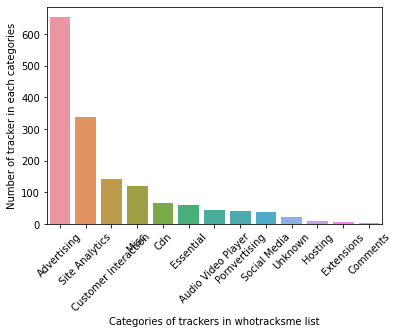

In [57]:
# draw bar
import matplotlib.pyplot as plt
import seaborn as sns
ax = plt.subplots()
ax = sns.barplot(y=df_trackers_categories['category'].value_counts().values, x=df_trackers_categories['category'].value_counts().index)

# plt.legend()
plt.xlabel('Categories of trackers in whotracksme list')
plt.xticks(rotation=45)
plt.ylabel('Number of tracker in each categories')

In [44]:
df_trackers_categories['company'].value_counts()

Owned by Google           66
Owned by Microsoft        50
Owned by Amazon           37
Owned by Verizon          22
Owned by Oracle           18
                          ..
Owned by Inbenta           1
Owned by OwnerIQ           1
Owned by emetriq           1
Owned by Fit Analytics     1
Owned by AkaNe             1
Name: company, Length: 732, dtype: int64